## This is the codes for the classification model for the capstone project

The data source of this project is from this link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv. The data was downloaded to the local computer at the directoy of this notebook. 

The data source is about the accident data in Seattle, United States from Jan 1, 2004 to May 20, 2020."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

#### Importing the data

In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

c:\users\509214\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Understanding the data

In [3]:
df.shape
print('There are in total', df.shape[0], 'rows and', df.shape[1], ' data fields')

There are in total 194673 rows and 38  data fields


In [4]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [5]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
# understand the data type of each column
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
# from the metadata description, some of the fields are not related to the accident which can be removed, 
# such as OBJECIID, INCKEY, COLDETKEY, X, Y
df.drop(columns=['OBJECTID','INCKEY', 'COLDETKEY', 'X', 'Y'], inplace=True)
df.columns.values

array(['SEVERITYCODE', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY',
       'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
       'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'], dtype=object)

In [8]:
# change the INCDATE to date time as it is presented as object when importing the data from the file
df['INCDATE'].head()
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDATE'].dtype
print('Range of the data period', df['INCDATE'].min(), df['INCDATE'].max())

Range of the data period 2004-01-01 00:00:00+00:00 2020-05-20 00:00:00+00:00


In [9]:
# The SEVERITYCODE is the label of the data set, let's look at its distribution
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


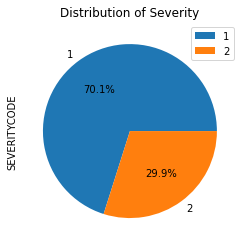

In [10]:
df['SEVERITYCODE'].value_counts().to_frame().plot(kind='pie', y='SEVERITYCODE', autopct='%1.1f%%')
plt.title('Distribution of Severity')
plt.show()

In [11]:
# Then, look at the distribution of other data fields, 
# for example 'STATUS' and see whether there is any obvious relationship between the feature and the severity
df_group = df[['SEVERITYCODE','STATUS','REPORTNO']].groupby(by=['SEVERITYCODE','STATUS']).count().reset_index()
df_group = df_group.pivot(index='STATUS', columns='SEVERITYCODE')['REPORTNO']
df_group

SEVERITYCODE,1,2
STATUS,,
Matched,132627,57159
Unmatched,3858,1029


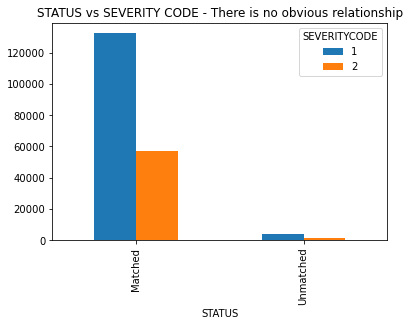

In [12]:
df_group.plot(kind='bar')
plt.title('STATUS vs SEVERITY CODE - There is no obvious relationship')
plt.show()

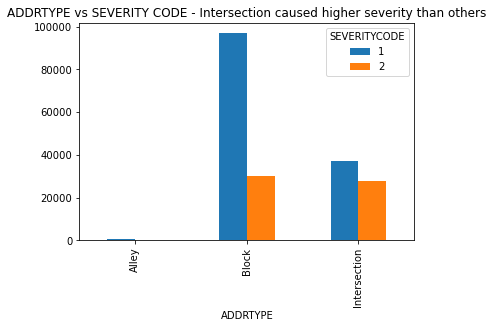

In [13]:
# Then, look at the distribution of other data fields, 
# for example 'STATUS' and see whether there is any obvious relationship between the feature and the severity
df_group = df[['SEVERITYCODE','ADDRTYPE','REPORTNO']].groupby(by=['SEVERITYCODE','ADDRTYPE']).count().reset_index()
df_group = df_group.pivot(index='ADDRTYPE', columns='SEVERITYCODE')['REPORTNO']
df_group
df_group.plot(kind='bar')
plt.title('ADDRTYPE vs SEVERITY CODE - Intersection caused higher severity than others')
plt.show()

c:\users\509214\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\509214\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\509214\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax

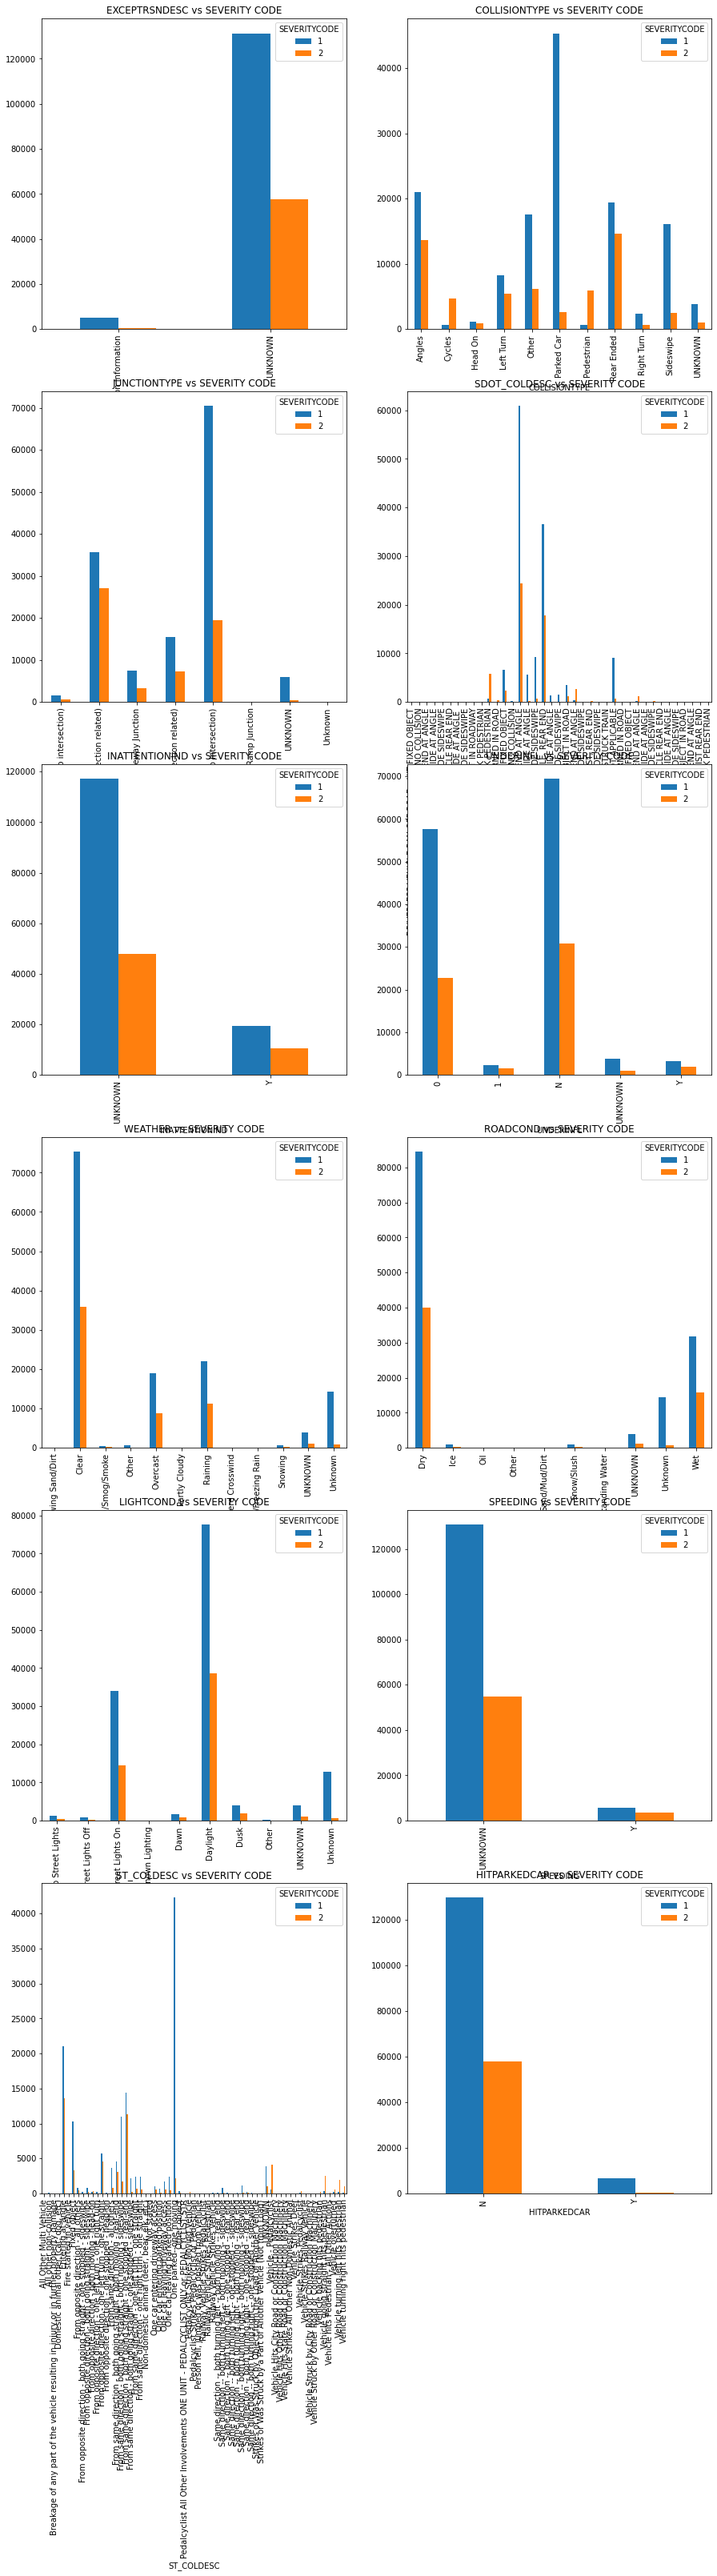

In [14]:
# To make is generalized, we can repeat the same process by plotting different categorical features to the severity
cat_col = ['EXCEPTRSNDESC', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC',
           'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLDESC', 'HITPARKEDCAR']
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(50)
fig.set_figwidth(15)
i = 0
j = 0
for col in cat_col:
    df_temp = df[['SEVERITYCODE',col,'REPORTNO']].fillna('UNKNOWN')
    df_temp = df_temp.replace('', 'BLANK')
    df_group = df_temp.groupby(by=['SEVERITYCODE',col]).count().reset_index()
    df_group = df_group.pivot(index=col, columns='SEVERITYCODE')['REPORTNO']
    df_group.plot(kind='bar', ax=axes[i, j])
    axes[i, j].set_title(col + ' vs SEVERITY CODE')
    j += 1
    if j > 1:
        i +=1
        j = 0
    
plt.show()

#### After reviewing all the categorical attributes, all of them have a certain level of relationship with the severity, except STATUS. Therefore, all of these attributes, except STATUS will be used as a FEATURES in the training model later

#### Next, we study the relationship between the severity and the numerical attributes

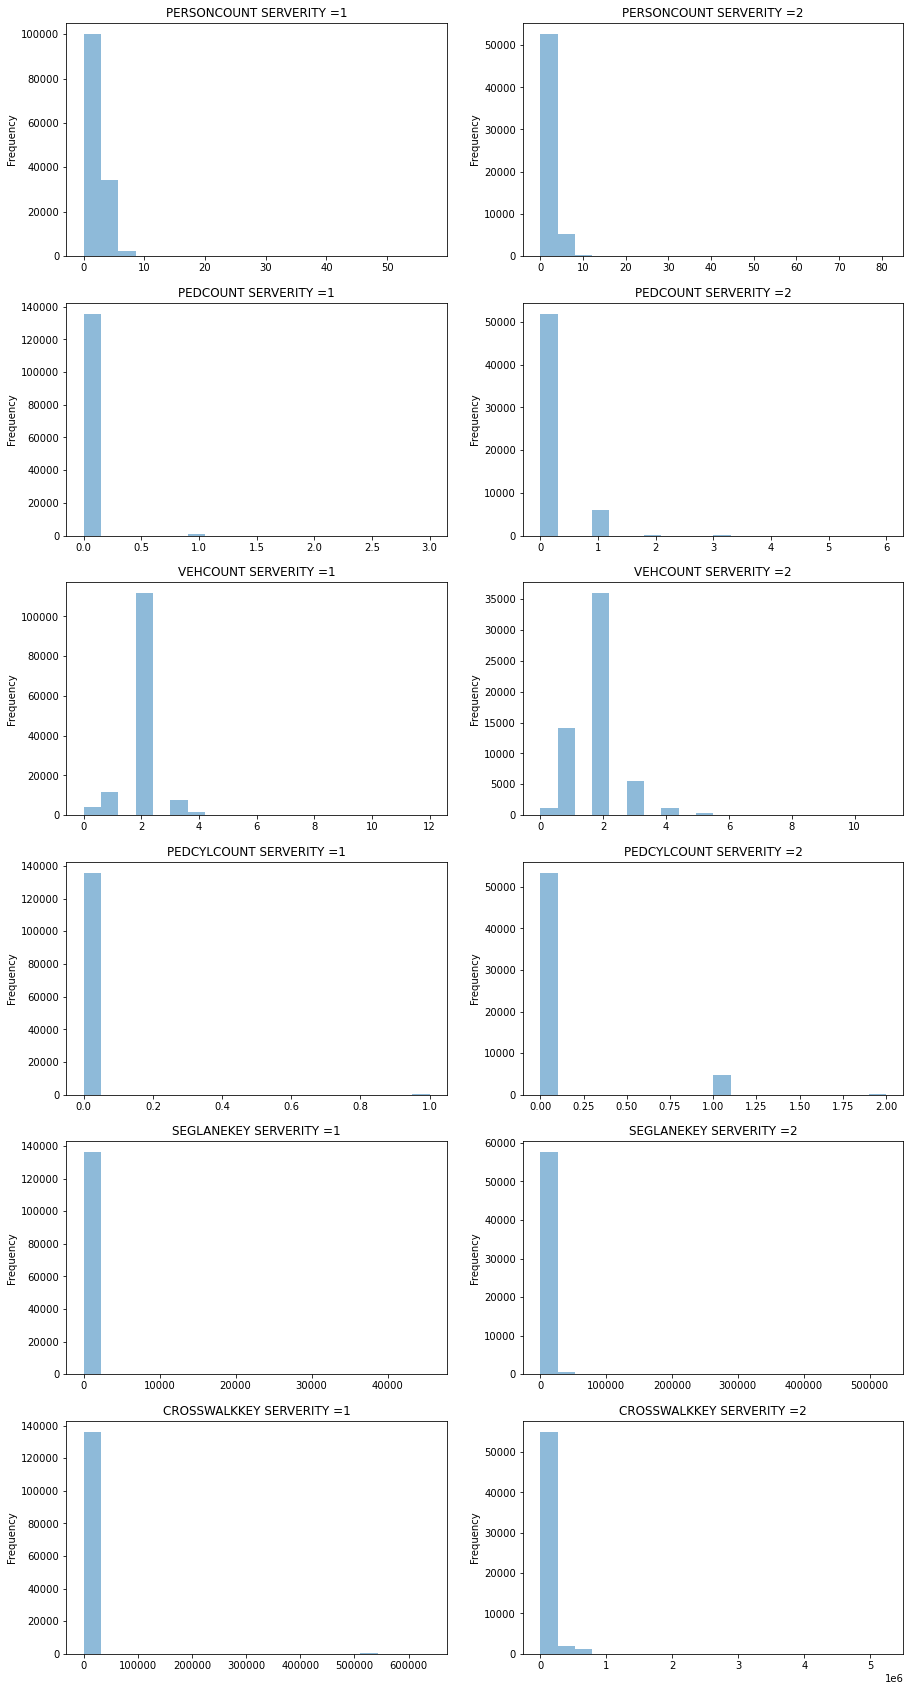

In [15]:
cat_col = ['PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'PEDCYLCOUNT', 'SEGLANEKEY', 'CROSSWALKKEY']
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(30)
fig.set_figwidth(15)
i = 0
for col in cat_col:
    for ser in range(1, 3):
        df[df['SEVERITYCODE']==ser][col].plot.hist(bins=20, alpha=0.5, ax=axes[i, ser-1])
        axes[i, ser-1].set_title(col + ' SERVERITY =' + str(ser))
    i +=1
    
plt.show()

#### After reviewing all the numerical attributes, no obvious relationship are found with the severity, but still they will be put into the classification model. The CROSSWALKKEY and SEGLANEKEY is not useful for the analysis. The followings are the FEATURES that we will include in the classification model:

In [16]:
feature_cat_cols = ['ADDRTYPE', 'EXCEPTRSNDESC', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC',
           'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLDESC', 'HITPARKEDCAR']
feature_num_cols = ['PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'PEDCYLCOUNT']
feature_all_cols = feature_cat_cols + feature_num_cols

In [17]:
# some values are with missing values in the categorical column and they are filled with 'Unknown'
df[feature_cat_cols] = df[feature_cat_cols].fillna('Unknown')

In [18]:
# duplicate the severity data twice to make the sample to be more equal 

df_serious = df[df['SEVERITYCODE']==2]
df['SEVERITYCODE']

0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 194673, dtype: int64

In [19]:
df_duplicate = df.append(df_serious)
df_normal = df

In [20]:
df_duplicate.shape

(252861, 33)

# Decision Tree Model

In [21]:
from sklearn import preprocessing

# This is to convert the categorical data into numerical label

df_duplicate['SEVERITYCODE'] = df_duplicate['SEVERITYCODE'] - 1
df_normal['SEVERITYCODE'] = df_normal['SEVERITYCODE'] - 1
X_duplicate = df_duplicate[feature_all_cols].values
y_duplicate = df_duplicate['SEVERITYCODE'].values

X_normal = df_normal[feature_all_cols].values
y_normal = df_normal['SEVERITYCODE'].values

i = 0
for col in feature_cat_cols:
    unique_values = df[col].unique().tolist()
    le = preprocessing.LabelEncoder()
    le.fit(unique_values)
    X_duplicate[:, i] = le.transform(X_duplicate[:, i])
    X_normal[:, i] = le.transform(X_normal[:, i])

    i += 1
    
X_normal
y_normal

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [22]:
X_normal = preprocessing.StandardScaler().fit(X_normal).transform(X_normal.astype(float))
X_duplicate = preprocessing.StandardScaler().fit(X_duplicate).transform(X_duplicate.astype(float))

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
tree_dup = DecisionTreeClassifier(criterion="entropy", max_depth = 20)

X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.3, random_state=3)
X_train_dup, X_test_dup, y_train_dup, y_test_dup = train_test_split(X_duplicate, y_duplicate, test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape)

(136271, 17) (58402, 17)


## This is using the original data set for training, without any duplicating of the severity level 2 data

In [27]:
X_train
y_train
tree.fit(X_train,y_train)
yhat = tree.predict(X_test)
print("Test set percision score: ", metrics.precision_score(y_test, yhat, labels=[1]))
print("Test set recall score: ", metrics.recall_score(y_test, yhat, labels=[1]))
print("Test set F1 score: ", metrics.f1_score(y_test, yhat, labels=[1]))

Test set percision score:  0.6438641779189833
Test set recall score:  0.36941042438051835
Test set F1 score:  0.46946827379013284


## This is using the data set where the severity level 2 data is duplicated, so that the ratio between level 1 and level 2 are more even

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
X_train_dup
y_train_dup
tree_dup.fit(X_train_dup,y_train_dup)
yhat = tree_dup.predict(X_test)
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print("Test set percision score: ", metrics.precision_score(y_test, yhat, labels=[1]))
print("Test set recall score: ", metrics.recall_score(y_test, yhat, labels=[1]))
print("Test set F1 score: ", metrics.f1_score(y_test, yhat, labels=[1]))

Test set percision score:  0.4510567482110168
Test set recall score:  0.7719737966391341
Test set F1 score:  0.5694117647058824


### The F1 score improved if we duplicate the level 2 data set to train the model because the recall ratio significantly improve

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[24354 16493]
 [ 4003 13552]]


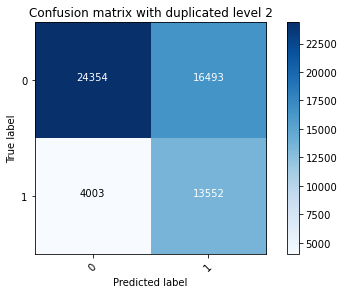

In [33]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix with duplicated level 2')

from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
print(X_train.shape, X_test.shape)

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)



yhat = clf.predict(X_test)
print(yhat [0:5])



print("Train set Accuracy: ", metrics.accuracy_score(y_train, tree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Test set precision: ", metrics.precision_score(y_test, yhat))
print("Test set recall: ", metrics.recall_score(y_test, yhat))
print("Test set F1 score: ", metrics.f1_score(y_test, yhat))
cnf_matrix = metrics.confusion_matrix(y_test, yhat)
print(cnf_matrix)
np.set_printoptions(precision=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.9, random_state=3)
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Test set F1 score: ", metrics.f1_score(y_test, yhat, labels=[1]))